# Important Util Methods

In [168]:
import numpy as np
from scipy.signal import butter, lfilter
from scipy.signal import argrelextrema
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs #Nyquist frequeny is half the sampling frequency
    low = lowcut / nyq 
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low')
    return b, a

def lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def calHeartRates(peak_list, fs):
    heart_rates_list = list()
    count = 0
    while (count < (len(peak_list))-1):
        peak_dist = (peak_list[count+1] - peak_list[count]) #Calculate interval between peaks in terms of number of samples
        heart_rates_list.append(60.0 * fs/peak_dist) #Append to list
        count += 1
    return heart_rates_list;

def plotSignal(sample_length, data, peaks, ybeat):
    plt.figure(figsize=(8,4))
    plt.title("Detected peaks in signal")
    plt.xlim(0, sample_length)
    plt.plot(data, alpha=0.5, color='blue') #Plot semi-transparent heart rate
    plt.scatter(peaks, ybeat, color='red') #Plot detected peaks
    plt.show()
        
def calBPM(heart_rates_list):
    bpm = np.mean(heart_rates_list)
    print("Average Heart Beat is: %.2f" %bpm) #Round off to 2 decimal and print
    
def calRespirationRates(dataset, peak_list, fs):
    interval_list = list()
    count = 0
    while (count < (len(peak_list))-1):
        #Calculate interval between peaks in terms of number of samples
        time_interval = (dataset.time[peak_list[count+1]] - dataset.time[peak_list[count]])
        interval_list.append(60/time_interval) #Convert to time interval and append to list
        count += 1
    return interval_list;

def calAvgRespirationRate(respiration_rates_list):
    resp_rate = np.mean(respiration_rates_list)
    print("Average Respiration rate is: %.01f" %resp_rate) #Round off to 1 decimal and print
    
def getAC_DC_ValuesForSignal(data):
    ## Calculate min and max peak indices and values
    min_peaks = argrelextrema(data, np.less)
    max_peaks = argrelextrema(data, np.greater)

    min_peak_values = [data[x] for x in min_peaks[0]] #Get the y-value of all min peaks for interpolation
    max_peak_values = [data[index] for index in max_peaks[0]] #Get the y-value of all max peaks to calculate amplitude

    ## Interpolate
    x = min_peaks[0];
    y = min_peak_values;
    f = interpolate.interp1d(x, y, fill_value="extrapolate")

    interpolated_min_peak_values = f(max_peaks[0])
    AC_values = (max_peak_values - interpolated_min_peak_values)
    DC_values = interpolated_min_peak_values
    return (AC_values, DC_values)

    
def calSPO2(ratioAverage): 
    return -45.060*ratioAverage* ratioAverage + 30.354 *ratioAverage + 94.845

def calAvgSPO2(ratio_avg_list):
    SPO2_values = [calSPO2(ratio_avg) for ratio_avg in ratio_avg_list]
    newList = list()
    for val in SPO2_values:
        if val > 90:
            newList.append(val)
    print("Average SPO2 is:", np.mean(newList))  

# FFT Transform

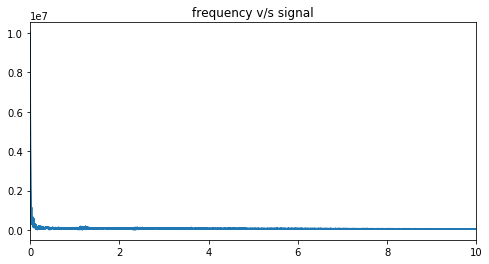

In [169]:
dataset = pd.read_csv("C:/Users/lenovo/Karishma/Study/Quarter4/EmbeddedUbiComp/Assignment6/sit_m.csv")
levelled_sp = dataset.IR - np.mean(dataset.IR)
fft_signal = np.fft.fft(levelled_sp)
timestep = 0.02
freq = np.fft.fftfreq(dataset.shape[0], d=timestep)
plt.figure(figsize=(8,4))
plt.plot(abs(freq), abs(fft_signal))
plt.title("frequency v/s signal")
plt.xlim(0, 10)
plt.show()

# Heart Rate Calculation

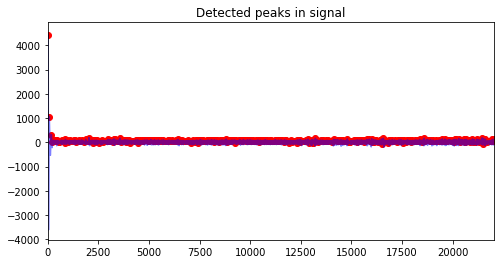

In [170]:
from scipy.signal import argrelextrema
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

dataset = pd.read_csv("C:/Users/lenovo/Karishma/Study/Quarter4/EmbeddedUbiComp/Assignment6/sit_m.csv")
Fs = 50;
T = 0.02;
mean_IR = np.mean(dataset.IR)
dataset.IR = dataset.IR - mean_IR
dataset.IR = bandpass_filter(dataset.IR, 0.5 ,2, Fs) #Lower cutoff freq: 0.5, Higher cutoff freq: 2
peak_list = argrelextrema(dataset.IR.values, np.greater)[0]

ybeat = [dataset.IR[x] for x in peak_list] #Get the y-value of all peaks for plotting purposes
plotSignal(len(dataset), dataset.IR, peak_list, ybeat)
    

In [173]:
heart_rates = calHeartRates(peak_list, 50)
heart_rate_plot_values = list()
print("Heart Rates obtained:")
for rate in heart_rates:
    if rate < 121 and rate > 59:
        heart_rate_plot_values.append(rate)
        print("%.2f" %rate) #Round off to 1 decimal and print
calBPM(heart_rate_plot_values)





Heart Rates obtained:
83.33
71.43
69.77
63.83
107.14
120.00
69.77
65.22
66.67
75.00
78.95
100.00
107.14
66.67
83.33
65.22
78.95
66.67
69.77
69.77
75.00
111.11
88.24
63.83
66.67
73.17
100.00
71.43
66.67
76.92
71.43
65.22
68.18
90.91
66.67
93.75
75.00
68.18
73.17
81.08
100.00
66.67
83.33
81.08
73.17
63.83
120.00
68.18
83.33
69.77
71.43
75.00
73.17
81.08
75.00
71.43
83.33
76.92
71.43
83.33
81.08
69.77
81.08
68.18
93.75
85.71
83.33
71.43
66.67
69.77
63.83
69.77
69.77
73.17
62.50
115.38
103.45
68.18
69.77
76.92
66.67
81.08
76.92
76.92
107.14
75.00
111.11
100.00
71.43
65.22
71.43
65.22
69.77
68.18
73.17
100.00
76.92
78.95
78.95
71.43
75.00
71.43
73.17
73.17
71.43
71.43
78.95
69.77
78.95
75.00
65.22
71.43
71.43
63.83
65.22
68.18
65.22
69.77
76.92
71.43
75.00
68.18
69.77
73.17
75.00
75.00
71.43
71.43
75.00
71.43
85.71
107.14
71.43
68.18
71.43
68.18
69.77
75.00
68.18
73.17
68.18
62.50
76.92
69.77
68.18
76.92
73.17
73.17
78.95
78.95
69.77
66.67
71.43
68.18
73.17
111.11
66.67
73.17
68.18
75.00
68

# Respiration Rate Calculation

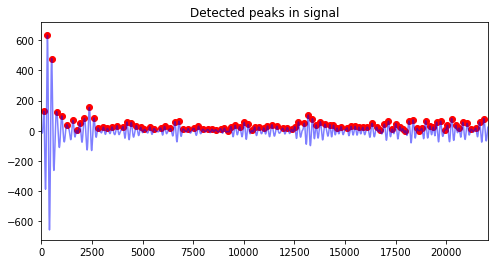

16.5
14.6
12.2
11.6
12.1
9.8
16.9
18.7
13.1
12.4
13.1
14.7
11.5
15.1
13.0
12.3
10.3
14.9
14.3
12.0
13.8
16.2
11.3
14.2
9.4
15.2
10.3
13.7
14.6
14.8
12.0
11.0
12.7
13.8
12.8
13.6
17.5
12.0
16.2
18.2
19.1
14.2
13.5
13.4
15.2
17.9
20.7
14.2
12.4
16.0
13.8
12.1
10.6
12.9
14.4
19.4
16.0
10.4
15.5
14.4
16.4
14.6
12.9
12.6
17.0
17.1
15.2
10.1
15.0
14.9
15.9
16.0
13.0
12.9
13.3
19.1
13.5
14.6
16.0
17.2
15.1
17.3
14.3
15.6
15.1
14.6
17.9
17.6
15.4
13.5
14.5
14.3
19.4
15.7
14.0
14.8
14.0
15.5
14.0
Average Respiration rate is: 14.4


In [175]:
from scipy.signal import argrelextrema
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

dataset = pd.read_csv("C:/Users/lenovo/Karishma/Study/Quarter4/EmbeddedUbiComp/Assignment6/sit_m.csv")
Fs = 50;
T = 0.02;
mean_IR = np.mean(dataset.IR)
dataset.IR = dataset.IR - mean_IR
dataset.IR = bandpass_filter(dataset.IR, 0.165, 0.3, Fs)
peak_list = argrelextrema(dataset.IR.values, np.greater)[0]

ybeat = [dataset.IR[x] for x in peak_list] #Get the y-value of all peaks for plotting purposes
plotSignal(len(dataset), dataset.IR, peak_list, ybeat)
respiration_rates = calRespirationRates(dataset, peak_list, Fs)
respiration_rate_plot_values = list()
for rate in respiration_rates:
    if rate < 21:
        respiration_rate_plot_values.append(rate)
        print("%.01f" %rate) #Round off to 1 decimal and print
calAvgRespirationRate(respiration_rate_plot_values)
      
# print(np.mean(respiration_rate_plot_values))
# print(len(respiration_rate_plot_values))
# print(len(respiration_rates))


# SPO2 Calculation

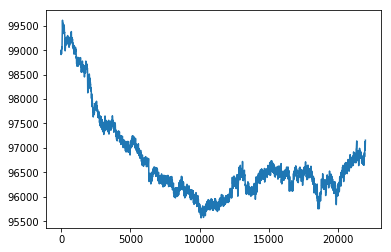

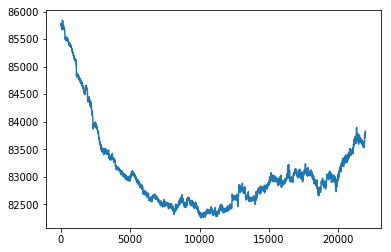

In [176]:
from scipy.signal import argrelextrema
from scipy import interpolate
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

dataset = pd.read_csv("C:/Users/lenovo/Karishma/Study/Quarter4/EmbeddedUbiComp/Assignment6/sit_m.csv")
Fs = 50;
T = 0.02;
IR_array = dataset.IR.values
RED_array = dataset.RED.values

IR_array = lowpass_filter(IR_array, 2, Fs)[100:]
RED_array = lowpass_filter(RED_array, 2, Fs)[100:]

plt.plot(IR_array)
plt.show()
plt.plot(RED_array)
plt.show()



In [177]:
## IR Calculations
AC_DC_values_IR = getAC_DC_ValuesForSignal(IR_array);

IR_AC_val = AC_DC_values_IR[0]
IR_DC_val = AC_DC_values_IR[1]

In [178]:
## RED Calculation
AC_DC_values_RED = getAC_DC_ValuesForSignal(RED_array);

RED_AC_val = AC_DC_values_RED[0]
RED_DC_val = AC_DC_values_RED[1]

In [179]:
ratio_avg_list = list()
for i in range(0, len(IR_AC_val)):
    ratioAverage = (RED_AC_val[i] * IR_DC_val[i])/(IR_AC_val[i] * RED_DC_val[i])
    ratio_avg_list.append(ratioAverage)
    
SPO2_values = [calSPO2(ratio_avg) for ratio_avg in ratio_avg_list]
## Calculate the average SPO2 values  
calAvgSPO2(ratio_avg_list)

SPO2_plot_values = list()
for val in SPO2_values:
    if val > 90:
        SPO2_plot_values.append(val)
        print("%.3f" %val) #Round off to 2 decimal and print


Average SPO2 is: 98.2361823676
99.691
99.949
99.889
99.588
99.931
99.943
99.950
99.292
97.049
91.904
97.239
99.947
99.917
99.615
99.474
95.176
99.825
97.219
99.020
96.443
96.089
99.620
97.205
97.204
99.431
98.528
99.324
99.543
92.556
96.892
99.678
98.267
94.918
98.756
98.730
97.145
97.471
95.411
99.957
98.561
97.379
99.865
99.480
98.420
98.302
95.942
95.285
99.736
95.809
97.972
99.777
99.158
99.954
99.752
95.766
96.732
99.933
98.601
96.251
95.975
92.774
99.878
99.474
97.525
96.886
94.526
99.495
97.041
99.919
99.845
99.209
97.140
99.802
99.902
99.554
96.947
98.143
91.433
99.627
98.886
97.762
96.300
99.731
99.866
99.225
98.284
98.872
99.552
94.318
99.008
96.516
97.924
99.861
99.261
96.850
98.478
98.022
98.392
99.837
98.383
99.423
99.944
99.572
99.946
98.674
98.548
99.659
99.252
97.395
99.952
95.636
99.149
95.881
98.740
99.846
96.401
99.564
99.651
95.766
95.180
99.947
97.687
99.721
97.219
99.828
99.625
99.948
98.314
99.525
96.985
98.853
99.511
98.815
98.762
96.213
96.627
97.435
99.806
93.

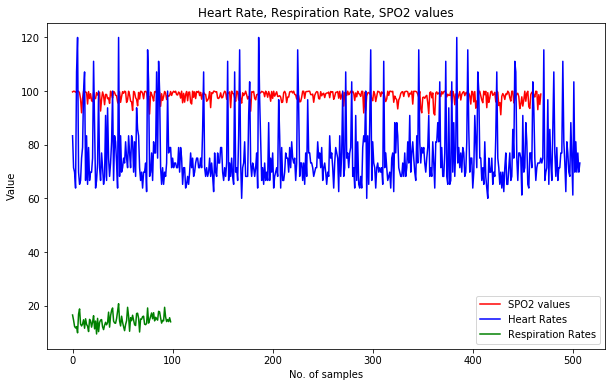

In [180]:
plt.figure(figsize=(10,6))
plt.title("Heart Rate, Respiration Rate, SPO2 values")
plt.plot(SPO2_plot_values, color='red',label="SPO2 values")
plt.plot(heart_rate_plot_values, color='blue', label="Heart Rates")
plt.plot(respiration_rate_plot_values,color='green', label="Respiration Rates")
plt.legend(loc='lower right')
plt.xlabel("No. of samples")
plt.ylabel("Value")
# plt.plot(data, alpha=0.5, color='blue') #Plot semi-transparent heart rate
#     plt.scatter(peaks, ybeat, color='red') #Plot detected peaks
plt.show()

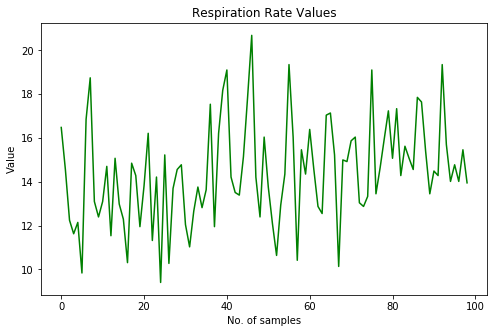

In [181]:
plt.figure(figsize=(8,5))
plt.title("Respiration Rate Values")
# plt.plot(SPO2_plot_values, color='red')
# plt.plot(heart_rate_plot_values, color='blue')
plt.plot(respiration_rate_plot_values,color='green')
plt.xlabel("No. of samples")
plt.ylabel("Value")
# plt.xlim(0, sample_length)
# plt.plot(data, alpha=0.5, color='blue') #Plot semi-transparent heart rate
#     plt.scatter(peaks, ybeat, color='red') #Plot detected peaks
plt.show()

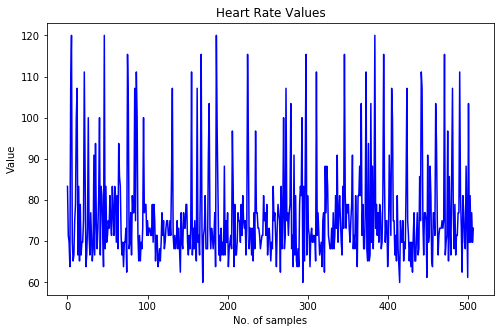

In [182]:
plt.figure(figsize=(8,5))
plt.title("Heart Rate Values")
# plt.plot(SPO2_plot_values, color='red')
plt.plot(heart_rate_plot_values, color='blue')
# plt.plot(respiration_rate_plot_values,color='green')
plt.xlabel("No. of samples")
plt.ylabel("Value")
# plt.xlim(0, sample_length)
# plt.plot(data, alpha=0.5, color='blue') #Plot semi-transparent heart rate
#     plt.scatter(peaks, ybeat, color='red') #Plot detected peaks
plt.show()

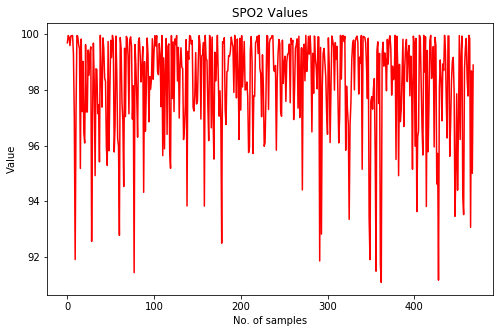

In [183]:
plt.figure(figsize=(8,5))
plt.title("SPO2 Values")
plt.plot(SPO2_plot_values, color='red')
# plt.plot(heart_rate_plot_values, color='blue')
# plt.plot(respiration_rate_plot_values,color='green')
plt.xlabel("No. of samples")
plt.ylabel("Value")
# plt.xlim(0, sample_length)
# plt.plot(data, alpha=0.5, color='blue') #Plot semi-transparent heart rate
#     plt.scatter(peaks, ybeat, color='red') #Plot detected peaks
plt.show()